# Evoluční algoritmy 

Evoluční algoritmy jsou heuristické optimalizační algoritmy, které jsou inspirovány evolucí v přírodě. Slouží například k optimalizaci reálnych funkcí, hledání řešení kombinatorických úloh, nebo třeba vývoji neuronových sítí. Obecný evoluční algoritmus vypadá takto: máme populaci jedinců, ze kterých se selekcí vyberou rodičové. Ti se zkříží a vzniknout děti, na kterých následně proběhne mutace. Na závěr se vytvoří nová populace. Existují různé druhy selekce, křížení a mutace a některé z nich si představíme v příkladu níže.

## Jednoduchý genetický algoritmus

Zkusíme si naprogramovat jednoduchý genetický algoritmus pro problém OneMAX. OneMAX je úloha, kdy máme jedince zapsaného jako binární řetězec 0 a 1 a chceme, aby obsahoval co nejvíce jedniček.

In [1]:
import numpy as np
import random
import copy
%matplotlib inline
import matplotlib.pyplot as plt

Nejprve si napíšeme funkci, co vytvoří náhodnou populaci jedinců velikosti *population_size*, kde každý jedince bude mít velikost *individual_size*.

In [2]:
def random_population(population_size, individual_size):
    population = []
    
    for i in range(0,population_size):
        individual = np.random.choice([0, 1], size=(individual_size,), p=[1/2, 1/2])
        population.append(individual)
        
    return population

Pro každou úlohu řešenou evolučním algoritmem je důležité správně definovat fitness funkci, která bude říkat, jak moc jsou jedinci dobří vzhledem k populaci a kterou se bude algoritmus snažit maximalizovat. Pro OneMAX problém bude vhodná fitness funkce počet jedniček v jedinci.

In [3]:
def fitness(individual):
    return sum(individual)

Dále si napíšeme funkci, která bude dělat selekci jedinců. Použijeme ruletovou selekci, tedy každému jedinci přiřadíme pomyslnou výseč rulety s velikostí úměrnou jeho fitness a z ní pak náhodně vybíráme jedince, kde lepší jedinci mají větší šanci být vybráni. Naštěstí knihovna random obsahuje funkci choices, která toto umí a nemusíme si to psát sami (jupí!).

In [4]:
def selection(population,fitness_value):
    return copy.deepcopy(random.choices(population, weights=fitness_value, k=len(population))) 

Potom, co máme vybrané dvojice jedinců, na nich provedeme křížení. Budeme dělat takzvané jednobodové křížení, teda si náhodně zvolíme bod v jedinci a hodnoty před tímto bodem vezmeme z jednoho rodiče a hodnoty po tomto bodu z druhého.

In [5]:
def crossover(population,cross_prob=1):
    new_population = []
    
    for i in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*i])
        indiv2 = copy.deepcopy(population[2*i+1])
        
        if print_stats:
            print(f'Mom: {indiv1}')
            print(f'Dad: {indiv2}')
            
        if random.random()<cross_prob:
            # zvolime index krizeni nahodne
            crossover_point = random.randint(0, len(indiv1)) 
            end2 =  copy.deepcopy(indiv2[:crossover_point])
            indiv2[:crossover_point] = indiv1[:crossover_point]
            indiv1[:crossover_point] = end2
            
            if print_stats:
                print(f'Crossover point: {crossover_point}' )
                print(f'Son: {indiv1}' )
                print(f'Daughter: {indiv2}' )
                print(f'----------')

        new_population.append(indiv1)
        new_population.append(indiv2)
        
    return new_population

Povedlo se nám vytvořit nové jedince pomocí křížení jejich rodičů. Následně na každém z nich provedeme mutaci tak, že si u každého bitu náhodně hodíme kostkou a s malou pravděpodobností ho změníme. 

In [6]:
def mutation(population,indiv_mutation_prob=0.1,bit_mutation_prob=0.2):
    new_population = []
    
    for i in range(0,len(population)):
        individual = copy.deepcopy(population[i])
        if random.random() < indiv_mutation_prob:
            for j in range(0,len(individual)):
                if random.random() < bit_mutation_prob:
                    if individual[j]==1:
                        individual[j] = 0
                    else:
                        individual[j] = 1
                        
                    if print_stats:
                        print(f'Mutated bit {j} in the individual {i} to value {individual}')
                        
        new_population.append(individual)
        
    return new_population

Když už tedy máme napsané všechny funkce potřebné pro genetický algoritmus na tento úkol, můžeme se zkusit podívat, jak by vypadal jeden krok evoluce. Vytvoříme si náhodnou populaci, vybereme jedince, zkřížíme je, zmutujeme nově vzniklé a hurá, máme novou populaci.

In [7]:
print_stats = True
population = random_population(6,8)
print('\nRandom initial population:')
print(np.array(population))

print('\nSELECTION')
fitness_value = list(map(fitness, population))
selected_population = selection(population,fitness_value)
print('Population after selection:')
print(np.array(selected_population))

print('\nCROSSOVER')
cross_population = crossover(selected_population)
print('Population after crossover:')
print(np.array(cross_population))

print('\nMUTATION')
mutated_population = mutation(cross_population, indiv_mutation_prob=0.3,bit_mutation_prob=0.2)
print('\nPopulation after mutation:')
print(np.array(mutated_population))
print_stats = False


Random initial population:
[[1 1 0 1 0 0 1 1]
 [0 1 1 1 1 1 0 0]
 [1 1 1 1 1 0 0 0]
 [0 1 1 1 0 1 1 0]
 [1 1 0 0 0 0 1 0]
 [0 0 0 0 1 1 1 1]]

SELECTION
Population after selection:
[[1 1 0 1 0 0 1 1]
 [0 0 0 0 1 1 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]]

CROSSOVER
Mom: [1 1 0 1 0 0 1 1]
Dad: [0 0 0 0 1 1 1 1]
Crossover point: 6
Son: [0 0 0 0 1 1 1 1]
Daughter: [1 1 0 1 0 0 1 1]
----------
Mom: [1 1 0 1 0 0 1 1]
Dad: [1 1 0 1 0 0 1 1]
Crossover point: 3
Son: [1 1 0 1 0 0 1 1]
Daughter: [1 1 0 1 0 0 1 1]
----------
Mom: [1 1 0 1 0 0 1 1]
Dad: [1 1 0 1 0 0 1 1]
Crossover point: 0
Son: [1 1 0 1 0 0 1 1]
Daughter: [1 1 0 1 0 0 1 1]
----------
Population after crossover:
[[0 0 0 0 1 1 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]
 [1 1 0 1 0 0 1 1]]

MUTATION
Mutated bit 4 in the individual 1 to value [1 1 0 1 1 0 1 1]
Mutated bit 6 in the individual 1 to value [1 1 0 1 1 0 0 1]
Mutated bit 7 in the individual 1 to

Vidíme, že nám jednotlivé kroky fungují (další jupí!), takže je na závěr spojíme do jednoho parádního genetického algoritmu, kde si tedy vytvoříme počáteční náhodnou populaci a tu necháme evolvovat, tedy v několika epochách budeme vytvářet novou populaci z té staré pomocí genetických operátorů selekce, křížení a mutace.

In [8]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value)
        children = crossover(parents)
        mutated_children = mutation(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

Na závěr tedy zkusíme náš krásný genetický algoritmus na OneMAX problém pustit a uvidíme, co se bude dít.

best fitness:  41
best individual:  [1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Generace')

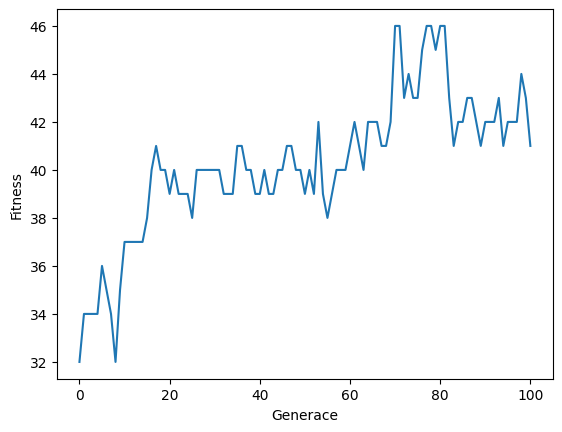

In [9]:
best, population, max_fitness = evolution(population_size=100,individual_size=50,max_generations=100)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

##  Úkol na cvičení

Vaším úkolem bude upravit výše napsaný algoritmus tak, aby uměl vyřešit problém součtu podmnožiny, který spočívá v nalezení podmnožiny dané množiny takové, že součet prvků v té nalezené podmnožine se rovná nějakému přesně zadanému číslu. V optimalizační verzi se tedy tento problém snaží minimalizovat rozdíl mezi zadanou hodnotou a součtem podmnožiny. Následně si zkuste hrát s různými druhy křížení, vyzkoušejte si například nahradit výše napsané jednobodové křížení za vícebodové nebo uniformní křížení a sledujte, jak se bude evoluce měnit.

In [10]:
random_set = []
for i in range(0,100):
    random_set.append(random.randint(100,150)) 
    
# for cyklus vyse se da napsat i v jednom prikazu
random_set = [random.randint(100,150) for i in range(0,100)]
    
value = sum(random_set)//2
print(value, random_set)

6366 [137, 106, 136, 104, 121, 113, 119, 143, 118, 114, 148, 123, 120, 102, 115, 113, 147, 108, 133, 148, 148, 145, 122, 149, 140, 147, 140, 118, 110, 100, 129, 106, 141, 140, 106, 113, 141, 103, 150, 138, 143, 100, 109, 142, 125, 135, 121, 145, 141, 130, 127, 119, 143, 123, 144, 108, 139, 124, 149, 142, 120, 136, 129, 131, 116, 107, 101, 112, 147, 123, 122, 148, 146, 116, 105, 142, 139, 111, 103, 147, 146, 125, 109, 133, 141, 127, 133, 126, 124, 119, 147, 107, 147, 141, 134, 137, 111, 114, 142, 105]


## Knihovna Deap 

V minulém cvičení jsme si sami zkusili napsat jednoduchý evoluční algoritmus pro OneMax problém. Nyní se podíváme na tento problém znovu a ukážeme si knihovnu, která má námi ručně psané funkce už naimplementované a usnadní nám tedy práci s psaním evolučního algoritmu, protože si ho nemusíme psát celý sami.

Deap je knihovna určená pro implementaci nejběžnějších evolučních technik jako například klasický evoluční algoritmus, genetecké programování, evoluční strategie, optimalizaci pomocí hejna a spoustu dalších metod.

### OneMax problém

K vyřešení OneMax problému je tedy potřeba definovat jedince, pak si vytvořit celou populaci a pak přidat operátory pro její evoluci. Začneme nejprv importy, které budeme v naší evoluci potřebovat.

In [11]:
import array
import random
import numpy as np
import math

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

Protože skutečná struktura jedinců v genetických algoritmech závisí na cílovém úkolu, deap neobsahuje žádnou explicitní strukturu, ale poskytuje raději metodu pro vytváření kontejneru s danými atributy, ke kterými se asociuje i fitness. Této metodě se říká ```deap.creator``` a můžeme s její pomocí velmi jednoduchým způsobem vytvořit vlastní jedince vhodné pro dané úkol. 

Vytvoříme tedy dvě třídy: První se bude jmenovat ```FitnessMax```, bude mít base class ```Fitness```, ze které dědí její vlastnosti, a všechny váhy budou 1, protože chceme max fitness jedince. Druhá třída bude ```Individual``` a ta bude popisovat našeho jedince, který bude pole 0 a 1 a bude mít námi výše vytvořenou fitness. Námi vytvořené třídy se potom dají volat přímo z ```creator```, protože jsou jeho součástí.

In [12]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

Nyní použijeme tyto třídy k vytvoření typů představujících naše jedince a pak i celou populaci jedinců. Tyto všechny objekty budou uloženy v kontejneru knihovny deap zvané ```toolbox```. Ta obsahuje dvě metody pro přidání a odebrání obsahu -- ```register()``` a ```unregister()```.

In [13]:
toolbox = base.Toolbox()

Nejprve si vytvoříme jedince jakožto posloupnost 1 a 0 a následně vytvoříme celou populaci. Generátor ```attr_bool``` zvolí náhodně buď 0, nebo 1. Dva inicializátory ```individual``` a ```population``` vytvoří instanci jednotlivce a populace. Naši jednotlivci budou generováni pomocí funkce ```initRepeat()```, která opakovaně volá výše vytvořenou třídu jedince ```Individual``` a pomocí ```attr_bool``` vytvaří náhodné jedince velikosti 100. Následně je obdobným způsobem vygenerovaná celá populace těchto náhodných jedinců.


In [14]:
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

Dále je třeba si zadefinovat fitness funkci. Ta bude velice jednoduchá, protože je potřeba pouze zjistit počet jedniček v jedinci.

In [15]:
def evalOneMax(individual):
    return sum(individual),

Teď už je jen potřeba registrace genetických operátorů, abychom mohli používat evoluci. Potřebujeme evaluaci pomocí naší výše vytvořené fitness, dvoubodové křížení, flip mutaci a selekci jedinců. Zde si pro změnu zkusíme turnajovou selekci.

In [16]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

Nyní máme definovanou reprezentaci a genetické operátory a zbývá už jen pustit evoluci. Vytvoříme si populaci ```n``` jedinců, zároveň si v hall of fame (```hof```) pamatujeme nejlepší jedince pro každou populaci, a nastavíme si pro zajímavost několik statistických hodnot pro každou populaci -- průměr, min, max a odchylku. Pak už jen zbývá pustit jednoduchý evoluční algoritmus pomocí ```eaSimple``` na danou populaci, s  daným toolboxem, pravděpodobnostmi operací a dalšími parametry. Parametr ```verbose``` mi jen říká, zda chci během evoluce vypisovat statistické hodnoty.

In [17]:
# pseudonahodny generator cisel, diky kteremu jsou jednotlive behy stejne pro snazsi ladeni
random.seed(64) 

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                               stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min	max
0  	300   	50.4933	5.33822	34 	64 
1  	181   	54.8333	4.34958	44 	66 
2  	191   	58.4567	3.45564	47 	68 
3  	199   	60.9533	2.9025 	52 	68 
4  	167   	62.96  	2.90719	47 	71 
5  	175   	64.99  	2.84896	57 	73 
6  	168   	66.9333	2.80515	58 	74 
7  	187   	68.9167	2.82661	59 	76 
8  	171   	70.8867	2.4455 	62 	76 
9  	155   	72.69  	2.62435	62 	80 
10 	171   	74.1233	2.61052	64 	82 
11 	191   	75.64  	2.70007	65 	82 
12 	171   	77.18  	2.55752	69 	84 
13 	173   	78.7667	2.24475	69 	84 
14 	185   	79.9067	2.36459	72 	86 
15 	205   	81.4433	2.3805 	72 	88 
16 	163   	82.6767	2.22534	74 	88 
17 	175   	83.6833	2.37411	76 	88 
18 	181   	84.8067	2.30274	74 	90 
19 	179   	85.6233	2.51955	74 	91 
20 	178   	86.58  	2.16416	78 	91 
21 	173   	87.2533	2.33148	78 	91 
22 	155   	88.06  	2.15787	79 	92 
23 	187   	88.37  	2.20146	80 	92 
24 	184   	89.2767	1.97825	82 	94 
25 	198   	89.7767	2.3805 	80 	95 
26 	185   	90.6233	2.41553	80 	96 
27 	160   	91.62  	2